# How can a credit card Fraud happen?
Some of the most common ways it may happen are:
Firstly and most ostensibly when your card details are overseen by some other person.
When your card is lost or stolen and the person possessing it knows how to get things done.
Fake phone call convincing you to share the details.
And lastly and most improbably, a high-level hacking of the bank account details.
Main challenges involved in credit card fraud detection are:
Enormous Data is processed every day and the model build must be fast enough to respond to the scam in time.
Imbalanced Data i.e most of the transactions(99.8%) are not fraudulent which makes it really hard for detecting the fraudulent ones
Data availability as the data is mostly private.
Misclassified Data can be another major issue, as not every fraudulent transaction is caught and reported.
And last but not the least, Adaptive techniques used against the model by the scammers.
How to tackle these challenges?
The model used must be simple and fast enough to detect the anomaly and classify it as a fraudulent transaction as quickly as possible.
Imbalance can be dealt with by properly using some methods which we will talk about in the next paragraph
For protecting the privacy of the user the dimensionality of the data can be reduced.
A more trustworthy source must be taken which double-check the data, at least for training the model.
We can make the model simple and interpretable so that when the scammer adapts to it with just some tweaks we can have a new model up and running to deploy.
Dealing with Imbalance
We will see in the later parts of the article that the data we received is highly imbalanced i.e only 0.17% of the total Credit Card transaction is fraudulent. Well, a class imbalance is a very common problem in real life and needs to be handled before applying any algorithm to it.
There are three common ways to deal with the imbalance of Data
Undersampling- One-sided sampling by Kubat and Matwin(ICML 1997)
Oversampling-SMOTE(Synthetic Minority Oversampling Technique)
Combining the above two.
The imbalance is not within the scope of this article. Here is another article guiding you to deal with this problem specifically.
For those of you who are wondering if the fraudulent transaction is so rare why even bother, well here is another fact. The amount of money involved in the fraudulent transaction reaches Billions of USD and by increasing the specificity to 0.1% we can save Millions of USD. Whereas higher Sensitivity means fewer people harassed.
THE CODE
Hello coders, in case you jumped directly to this part, here is what you need to know. Credit Card fraud is bad and we have to find a way to identify fraud using some of the features given to us in the data on which you can completely rely on for now. So without further adieu, let’s get started.
First chose a platform, I prefer Google Colab but Kaggle is amazing too. You can compare these two from this article in terms of GPU configuration as the price is not a factor(both of them are free to use).
If you want me to make an article on How to use Google Colab or Kaggle platform or your local machine to build your classifier, then please let me know in the comments below 😉.
Here is the GitHub link to the repository of the Notebook. You can fork it and even push to suggest some changes in the repository. Feel free to try it out.
Importing dependencies
Here is the code to import all the dependencies needed
# import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
In case you have not installed all these dependencies, I would like to recommend installing Anaconda distribution which includes most of the packages you will come across. You can also watch this video for windows guide to install Anaconda or read this article by Analytical Vidya for Mac or Linux.
Loading the Data
You have to first download the data from the Kaggle website. Click the download button next to the new Notebook button in the middle of the screen.
Now you can use this code to load the dataset to the ipython notebook you are working on.
Note: The path in the parenthesis must be the path where you stored the dataset in your machine. If you are using Colab then you can mount your drive to the notebook and provide it to your Google Drive’s directory path for the dataset.

### Importing dependencies
Here is the code to import all the dependencies needed

In [1]:
# import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

In [2]:
# Load the dataset from the csv file using pandas
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Due to some confidentiality issues, the original features are replaced with V1, V2, … V28 columns which are the result of PCA transformation applied to the original ones. The only features which have not been transformed with PCA are ‘Time’ and ‘Amount’. Feature ‘Class’ is the response variable and it takes value 1 in case of fraud and 0 otherwise.
Time
Number of seconds elapsed between this transaction and the first transaction in the dataset.
Amount
Transaction amount
Class
1 for fraudulent transactions, 0 otherwise
Know the numbers
You can chose to uncomment the second line if you want to work on a smaller dataset first and then when everything is working fine, comment it once again and run all the cells.

In [3]:
# Print the shape of the data
# data = data.sample(frac=0.1, random_state = 48)
print(data.shape)
print(data.describe())

(284807, 31)
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552563e-15  2.010663e-15 -1.694249e-15 -1.927028e-16 -3.137024e-15   
std    1.380247e+00  1.332271

##### Now we will be visualizing all the features from the dataset on graphs

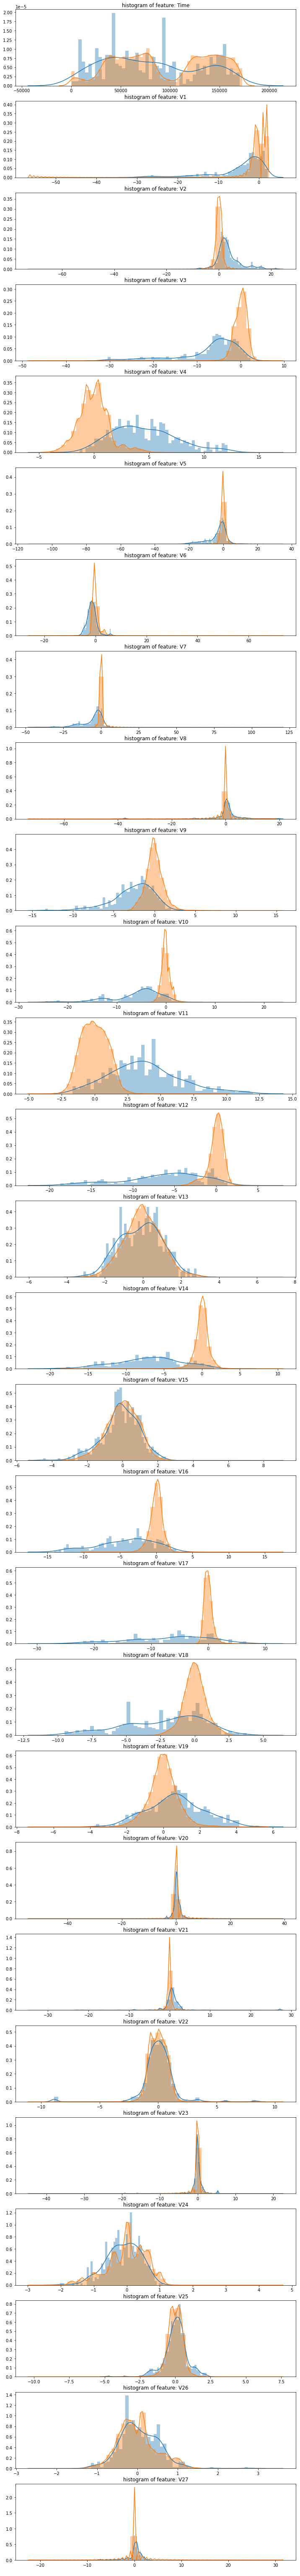

In [6]:
# distribution of anomalous features
features = data.iloc[:,0:28].columns
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, c in enumerate(data[features]):
    ax = plt.subplot(gs[i])
    sns.distplot(data[c][data.Class == 1], bins=50)
    sns.distplot(data[c][data.Class == 0], bins=50)
    ax.set_xlabel(' ')
    ax.set_title('histogram of feature: ' + str(c))
plt.show()

Let’s separate the Fraudulent cases from the authentic ones and compare their occurrences in the dataset.

In [7]:
# Determine number of fraud cases in dataset
Fraud = data[data['Class'] == 1]
Valid = data[data['Class'] == 0]
outlier_fraction = len(Fraud)/float(len(Valid))
print(outlier_fraction)
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))

0.0017304750013189597
Fraud Cases: 492
Valid Transactions: 284315


In [8]:
Fraud.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


fraud There is only 0.17% fraudulent transaction out all the transactions. The data is highly Unbalanced. Lets first apply our models without balancing it and if we don’t get a good accuracy then we can find a way to balance this dataset.

In [9]:
print('Amount details of fraudulent transaction')
Fraud.Amount.describe()

Amount details of fraudulent transaction


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [10]:
print('details of valid transaction')
Valid.Amount.describe()

details of valid transaction


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

As we can clearly notice from this, the average Money transaction for the fraudulent ones are more. This makes this problem crucial to deal with.

Correlation matrix graphically gives us an idea of how features correlate with each other and can help us predict what are the features that are most relevant for the prediction.

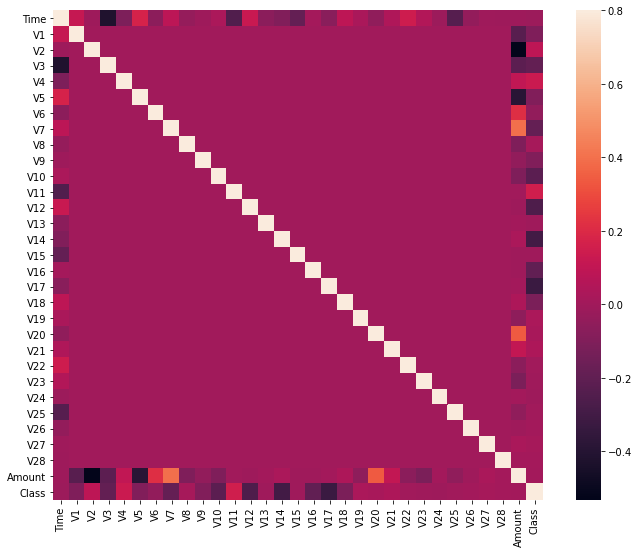

In [11]:
# Correlation matrix
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In the HeatMap we can clearly see that most of the features do not correlate to other features but there are some features that either has a positive or a negative correlation with each other. For example “V2” and “V5” are highly negatively correlated with the feature called “Amount”. We also see some correlation with “V20” and “Amount”. This gives us a deeper understanding of the Data available to us.
With that out of the way let’s proceed with dividing the data values into Features and Target.

In [12]:
#dividing the X and the Y from the dataset
X=data.drop(['Class'], axis=1)
Y=data['Class']
print(X.shape)
print(Y.shape)

(284807, 30)
(284807,)


In [13]:
#getting just the values for the sake of processing (its a numpy array with no columns)
X_data=X.values
Y_data=Y.values

In [15]:
X_data.shape

(284807, 30)

In [17]:
Y_data.shape

(284807,)

Using Skicit learn to split the data into Training and Testing.

In [18]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size = 0.2, random_state = 42)

# Building the Isolation Forest Model

Isolation forest is generally used for Anomaly detection. 

In [19]:
#Building another model/classifier ISOLATION FOREST
from sklearn.ensemble import IsolationForest
ifc=IsolationForest(max_samples=len(X_train),contamination=outlier_fraction,random_state=1)
ifc.fit(X_train)
scores_pred = ifc.decision_function(X_train)
y_pred = ifc.predict(X_test)

In [20]:
y_pred

array([-1,  1,  1, ...,  1,  1,  1])

## Building an Evaluation Matrix on Test Set

In [21]:
# Reshape the prediction values to 0 for valid, 1 for fraud. 
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1
n_errors = (y_pred != Y_test).sum()

In [22]:
n_errors

117

### Visualizing the Confusion Matrix for this model.

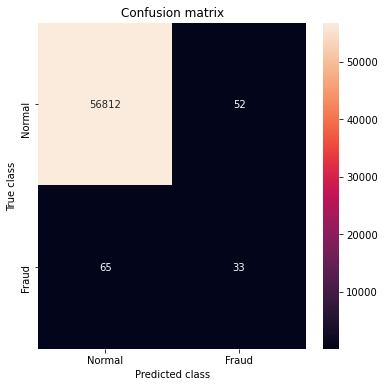

In [25]:
from sklearn.metrics import confusion_matrix
#printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, xticklabels=LABELS,yticklabels=LABELS, annot=True, fmt='d');
plt.title('Confusion matrix')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

#### Let’s see how to Evaluate the Model and print the results. We will be calculating the Accuracy, Precision, Recall, F1-Score and the Matthews correlation coefficient for the sake of totality.

In [29]:
#evaluation of the model
#printing every score of the classifier
#scoring in any thing
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.metrics import matthews_corrcoef
n_outliers = len(Fraud)
print('the Model used is {}'.format('Isolation Forest'))
acc= accuracy_score(Y_test,y_pred)
print('The accuracy is {}'.format(acc))
prec= precision_score(Y_test,y_pred)
print('The precision is {}'.format(prec))
rec= recall_score(Y_test,y_pred)
print('The recall is {}'.format(rec))
f1= f1_score(Y_test,y_pred)
print('The F1-Score is {}'.format(f1))
MCC=matthews_corrcoef(Y_test,y_pred)
print('The Matthews correlation coefficient is{}'.format(MCC))

the Model used is Isolation Forest
The accuracy is 0.9979459990871107
The precision is 0.38823529411764707
The recall is 0.336734693877551
The F1-Score is 0.36065573770491804
The Matthews correlation coefficient is0.3605460930519415


##### As you can clearly see this model is not doing as great as expected, so let’s build some other model to get a better result.

# Building the Random Forest Model

Lets us Build a Random Forest to increase the performance of the Detector. I thought of using a Decision Tree Model but as we know Random Forest is like an army of Decision Trees, then why to even bother trying and failing. You can think Random Forest to be the Ensembling applied to the Decision Tree. Here is a nice and easy explanation for Random forest.

In [30]:
# Building the Random Forest Classifier (RANDOM FOREST)
from sklearn.ensemble import RandomForestClassifier
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(X_train,Y_train)
# predictions
y_pred = rfc.predict(X_test)

##### Building an Evaluation matrix on test set
Let’s see how to Evaluate the Model and print the results. We will be calculating the Accuracy, Precision, Recall, F1-Score, and the Matthews correlation coefficient.

In [32]:
#Evaluating the classifier
#printing every score of the classifier
#scoring in any thing
from sklearn.metrics import classification_report, accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
from sklearn.metrics import confusion_matrix
n_outliers = len(Fraud)
n_errors = (y_pred != Y_test).sum()
print('The model used is Random Forest classifier')
acc= accuracy_score(Y_test,y_pred)
print('The accuracy is {}'.format(acc))
prec= precision_score(Y_test,y_pred)
print('The precision is {}'.format(prec))
rec= recall_score(Y_test,y_pred)
print('The recall is {}'.format(rec))
f1= f1_score(Y_test,y_pred)
print('The F1-Score is {}'.format(f1))
MCC=matthews_corrcoef(Y_test,y_pred)
print('The Matthews correlation coefficient is {}'.format(MCC))

The model used is Random Forest classifier
The accuracy is 0.9995962220427653
The precision is 0.9746835443037974
The recall is 0.7857142857142857
The F1-Score is 0.8700564971751412
The Matthews correlation coefficient is 0.8749276812909632


Visualizing the confusion matrix as well.

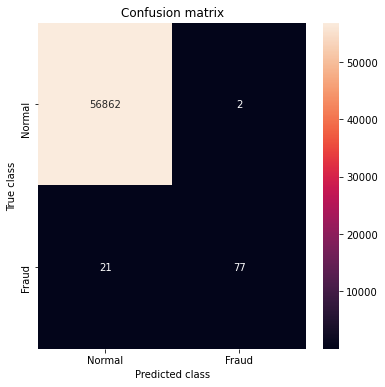

In [34]:
#printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt='d');
plt.title('Confusion matrix')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

# Visualizing the Forest

A single tree from the forest is taken randomly and then visualized for the sake of knowing how the Algorithm is taking its decision and this will help in changing the model easily if a countermeasure is taken by the scammers. For that, you have to import some Tools from Sklearn library and IPython library to display it in your Notebook.

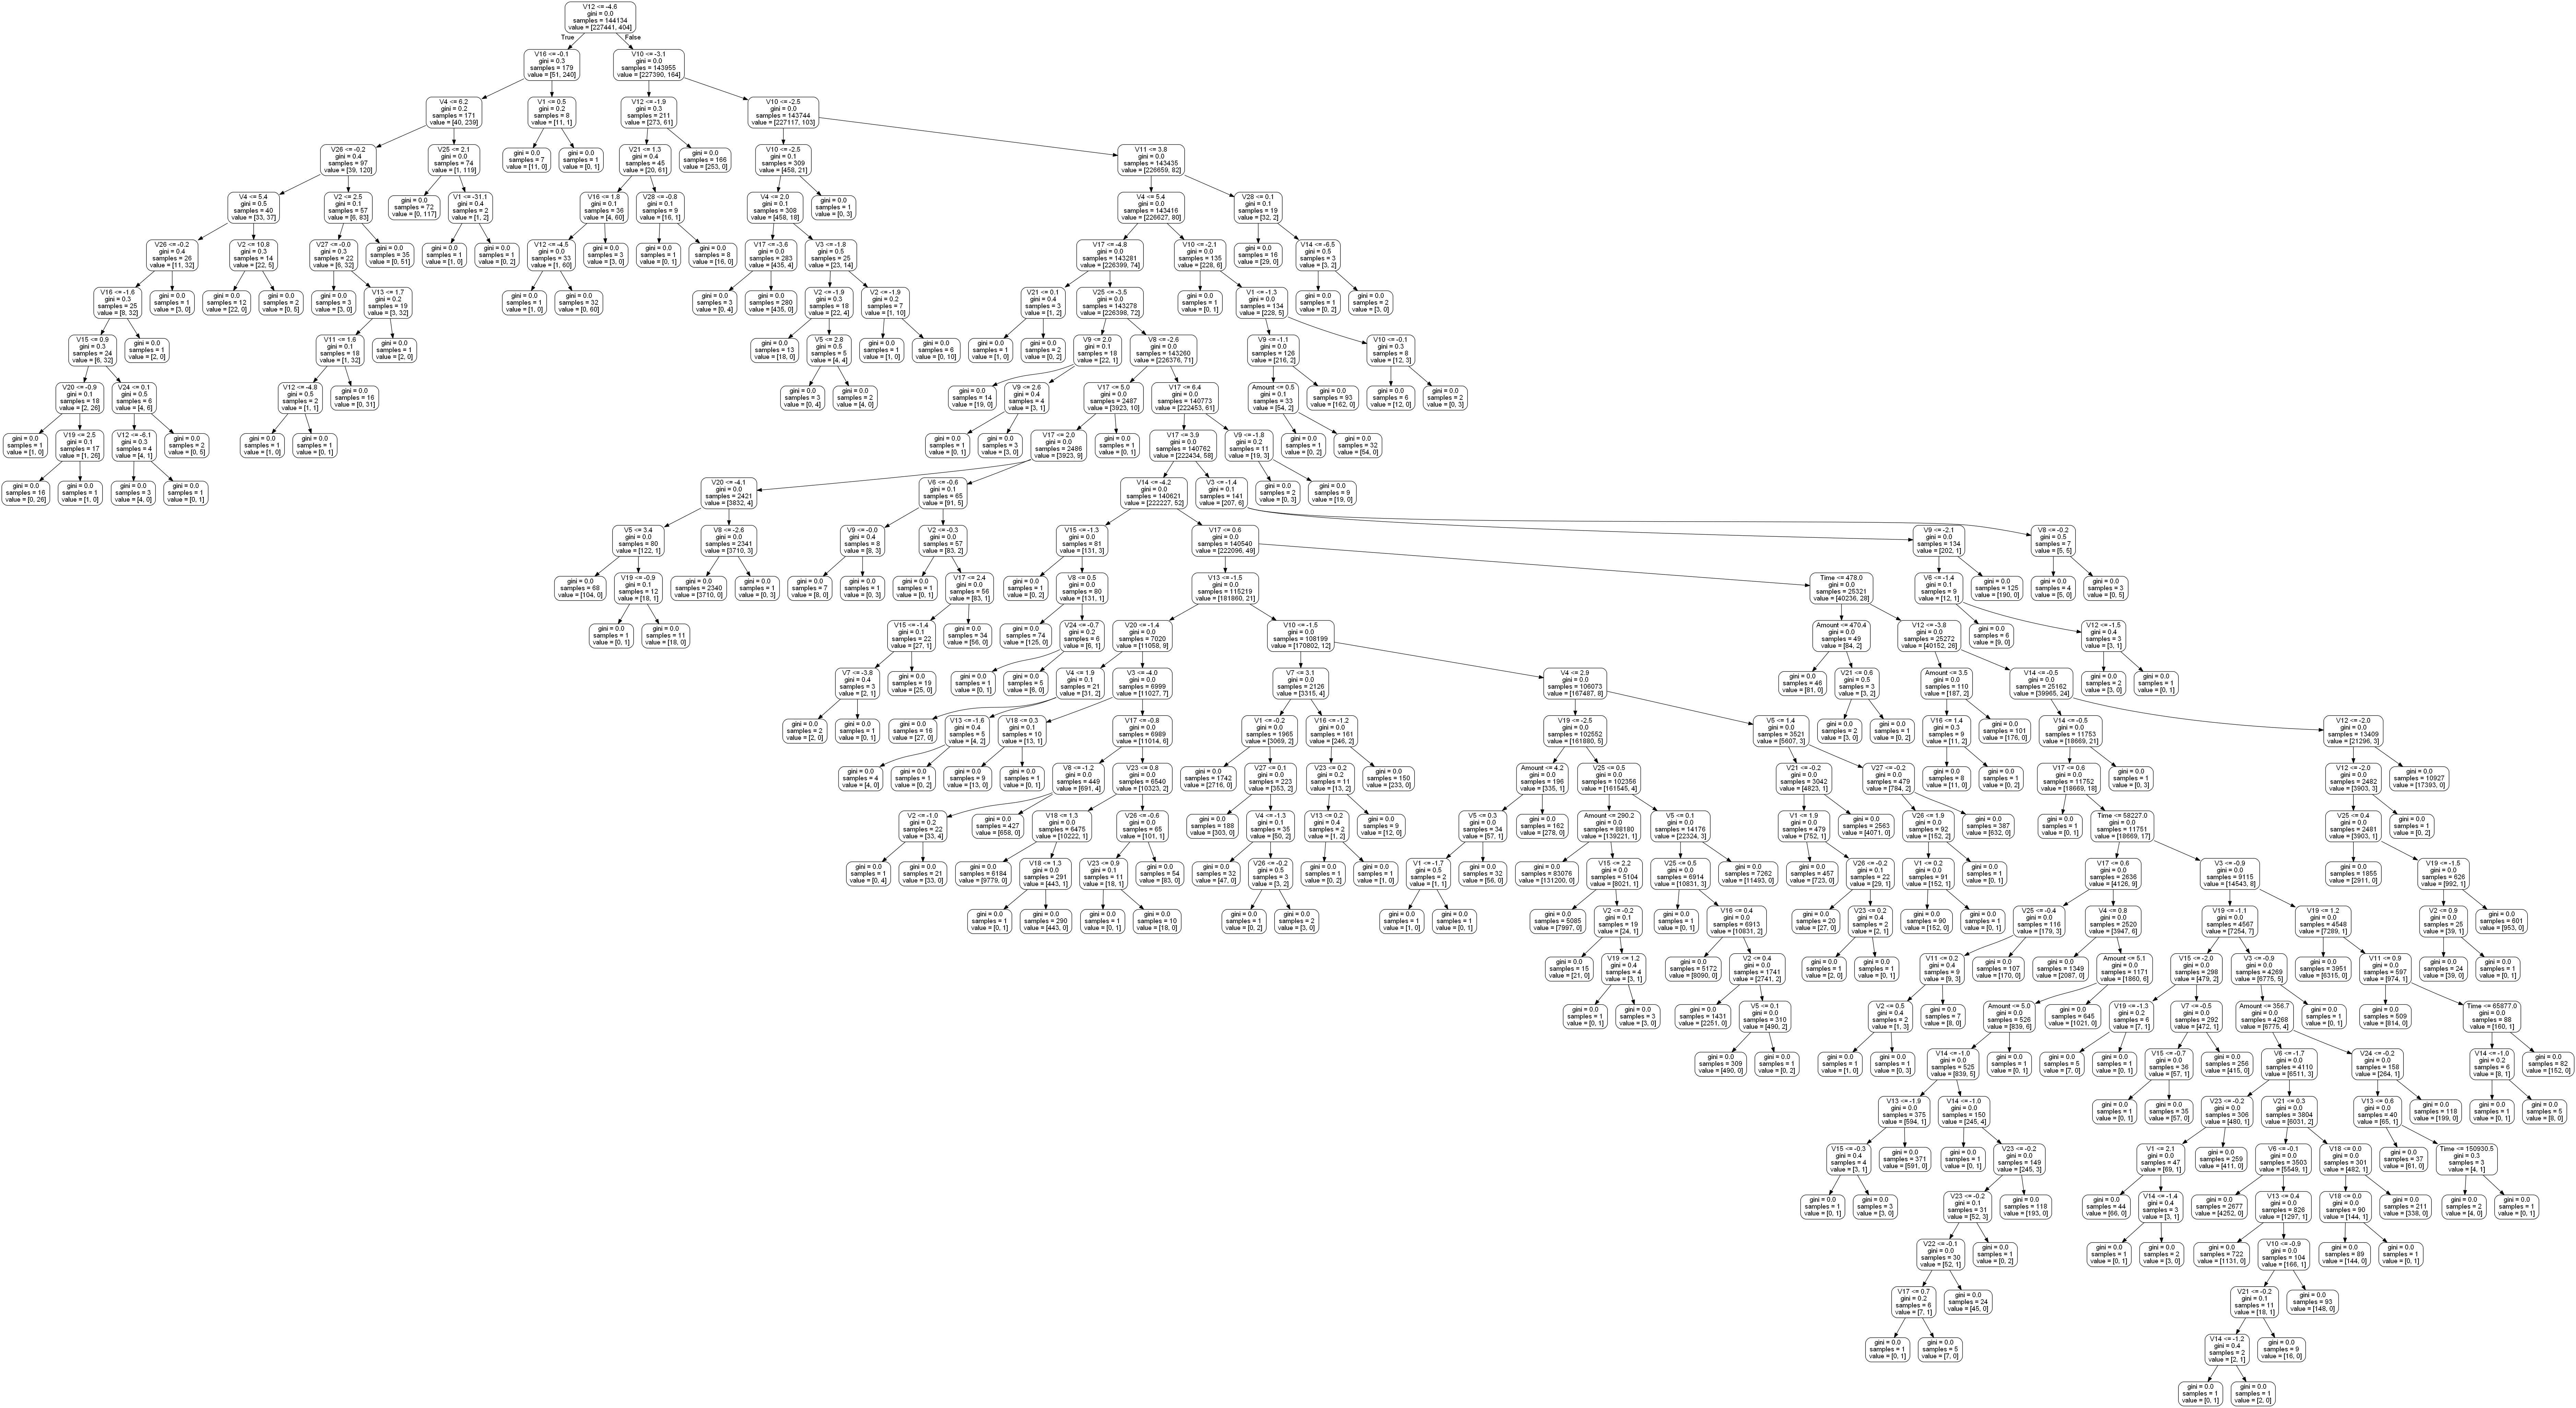

In [37]:
#visualizing the random tree 
feature_list = list(X.columns)
# Import tools needed for visualization
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydot
#pulling out one tree from the forest
tree = rfc.estimators_[5]
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
display(Image(graph.create_png()))

# Save Best Model 

In [47]:
import pickle

Pkl_Filename = "fraud_model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(rfc, file)

In [48]:
# Load the Model back from file
with open(Pkl_Filename, 'rb') as file:  
    Pickled_rfc = pickle.load(file)

Pickled_rfc

RandomForestClassifier()